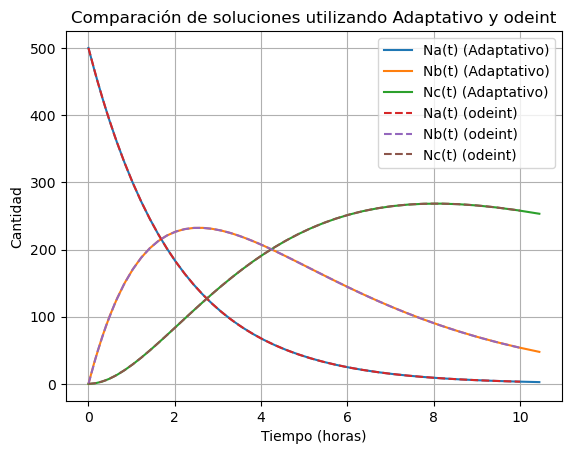

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def system(N, t, lambda_a, lambda_b, lambda_c):
    Na, Nb, Nc = N
    dNa_dt = -lambda_a * Na
    dNb_dt = lambda_a * Na - lambda_b * Nb
    dNc_dt = lambda_b * Nb - lambda_c * Nc
    return [dNa_dt, dNb_dt, dNc_dt]

def Increment(f, r, t, h, lambda_a, lambda_b, lambda_c):
    k1 = h * np.array(f(r, t, lambda_a, lambda_b, lambda_c))
    k2 = h * np.array(f(r + 0.5 * k1, t + 0.5 * h, lambda_a, lambda_b, lambda_c))
    k3 = h * np.array(f(r + 0.5 * k2, t + 0.5 * h, lambda_a, lambda_b, lambda_c))
    k4 = h * np.array(f(r + k3, t + h, lambda_a, lambda_b, lambda_c))
    return r + (k1 + 2 * k2 + 2 * k3 + k4) / 6

def Adaptativo(f, r0, t, lambda_a, lambda_b, lambda_c, e=1e-4, max_steps=45):
    t0, tf = t[0], t[-1]
    h = (tf - t0) / (len(t) - 1)
    r = np.array(r0)
    TimeVector = [t0]
    Vectors = [r0]

    step_count = 0
    while TimeVector[-1] < tf and step_count < max_steps:
        t = TimeVector[-1]
        r1 = Increment(f, r, t, h, lambda_a, lambda_b, lambda_c)
        r2 = Increment(f, r1, t + h, h, lambda_a, lambda_b, lambda_c)
        rt = Increment(f, r, t, 2 * h, lambda_a, lambda_b, lambda_c)

        error = np.linalg.norm(r2 - rt)

        if error < e:
            t += 2 * h
            r = rt
            TimeVector.append(t)
            Vectors.append(r.tolist())
            step_count += 1

        q = 0.85 * (e / error)**(1/4)
        h = h * min(5, max(0.1, q))

    return TimeVector, Vectors

lambda_a = 0.5
lambda_b = 0.3
lambda_c = 0.1
N0 = [500, 0, 0]  
t = np.linspace(0, 10, 50)  

TimeVector, Vectors = Adaptativo(system, N0, t, lambda_a, lambda_b, lambda_c, e=1e-4)

sol_odeint = odeint(system, N0, t, args=(lambda_a, lambda_b, lambda_c))

plt.plot(TimeVector, np.array(Vectors)[:, 0], label='Na(t) (Adaptativo)')
plt.plot(TimeVector, np.array(Vectors)[:, 1], label='Nb(t) (Adaptativo)')
plt.plot(TimeVector, np.array(Vectors)[:, 2], label='Nc(t) (Adaptativo)')
plt.plot(t, sol_odeint[:, 0], '--', label='Na(t) (odeint)')
plt.plot(t, sol_odeint[:, 1], '--', label='Nb(t) (odeint)')
plt.plot(t, sol_odeint[:, 2], '--', label='Nc(t) (odeint)')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Cantidad')
plt.title('Comparación de soluciones utilizando Adaptativo y odeint')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
t_max_B = TimeVector[np.argmax(np.array(Vectors)[:, 1])]
index_t_max_B = np.argmin(np.abs(np.array(TimeVector) - t_max_B))
NB_max = Vectors[index_t_max_B][1]
NC_max = Vectors[index_t_max_B][2]

print("Cantidad de partículas B en el momento de máximo:", NB_max)
print("Cantidad de partículas C en el momento de máximo:", NC_max)
print("t_max_B")


Cantidad de partículas B en el momento de máximo: 232.23953030118665
Cantidad de partículas C en el momento de máximo: 121.41891203524617
t_max_B


In [3]:
indice_max_B = np.argmax(np.array(Vectors)[:, 1])
momento_max_B = TimeVector[indice_max_B]

print("El momento en que la cantidad de partículas B es máxima es:", momento_max_B)

El momento en que la cantidad de partículas B es máxima es: 2.6445694909367092
